# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

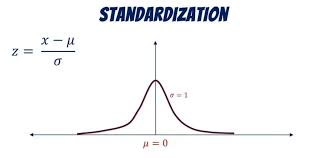

In [15]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('/content/covid_africa.csv')

# Handle non-numeric data
encoded_data = pd.get_dummies(data)

# Extract numerical data and handle missing values
numerical_data = encoded_data.fillna(0).astype(float).values

# Find the mean
data_mean = np.mean(numerical_data, axis=0)
data_std = np.std(numerical_data, axis=0)

# Since we divide by standard deviation and as we know, we don't
# divide by zero, so, that is why we are going to replace where standard deviation is zero by one
data_std[data_std == 0] = 1

# Standardize the data
standardized_data = (numerical_data - data_mean) / data_std
standardized_data[:5]

# standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
# standardized_data[:5]  # Display the first few rows of standardized data

array([[ 7.53288566e-02,  1.45263131e-01, -2.24975895e-02,
         4.40968561e+00, -2.88465055e-01, -3.07180141e-01,
        -4.40908289e-01, -7.04767903e-01,  5.19367240e-01,
         7.28010989e+00, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-01,
        -1.37360564e-01, -1.37360564e-01, -1.37360564e-0

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [8]:
# Step 3: Calculate the Covariance Matrix
# print(type(standardized_data))

# cov_matrix = standardized_data.cov()  # Calculate covariance matrix
# cov_matrix

# Covariance matrix gives us the relationship between columns in our data set

# Step 2: Calculate the Covariance Matrix
# Covariance matrix calculation
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)
cov_matrix

array([[ 1.01886792,  0.99563389,  0.98183004, ..., -0.01345422,
         0.02911999,  0.00907659],
       [ 0.99563389,  1.01886792,  0.95026162, ..., -0.01099794,
        -0.00678425,  0.00911591],
       [ 0.98183004,  0.95026162,  1.01886792, ..., -0.02423258,
         0.03723199,  0.01619954],
       ...,
       [-0.01345422, -0.01099794, -0.02423258, ...,  1.01886792,
        -0.01922392, -0.01922392],
       [ 0.02911999, -0.00678425,  0.03723199, ..., -0.01922392,
         1.01886792, -0.01922392],
       [ 0.00907659,  0.00911591,  0.01619954, ..., -0.01922392,
        -0.01922392,  1.01886792]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [9]:
# Step 4: Perform Eigendecomposition

# We are finding these eigen values because they will help us to minimise the dataset

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([ 5.65420673e+00+0.00000000e+00j,  3.10171559e+00+0.00000000e+00j,
         1.92866342e+00+0.00000000e+00j,  1.63956310e+00+0.00000000e+00j,
         1.70891194e+00+0.00000000e+00j,  1.28092880e+00+0.00000000e+00j,
         1.04495579e+00+0.00000000e+00j,  1.06461368e+00+0.00000000e+00j,
         1.08907889e+00+0.00000000e+00j,  5.38837130e-16+0.00000000e+00j,
         1.64143628e-16+0.00000000e+00j, -1.63206274e-16+1.79578086e-16j,
        -1.63206274e-16-1.79578086e-16j, -7.89183573e-16+0.00000000e+00j,
        -3.22220474e-16+0.00000000e+00j, -3.95601202e-16+0.00000000e+00j,
        -6.01863561e-16+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
         1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
         1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
         1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        -5.66111318e-16+0.00000000e+00j, -2.68952205e-16+0.00000000e+00j,
         1.03809185e+00+0.00000000e+00

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [10]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
# Sort eigenvectors accordingly
sorted_eigenvectors = eigenvectors[:,sorted_indices]

sorted_eigenvectors
sorted_eigenvalues

array([ 5.65420673e+00+0.00000000e+00j,  3.10171559e+00+0.00000000e+00j,
        1.92866342e+00+0.00000000e+00j,  1.70891194e+00+0.00000000e+00j,
        1.63956310e+00+0.00000000e+00j,  1.28092880e+00+0.00000000e+00j,
        1.08907889e+00+0.00000000e+00j,  1.06461368e+00+0.00000000e+00j,
        1.04495579e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+1.33111064e-16j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00-1.33111064e-16j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185e+00+0.00000000e+00j,
        1.03809185e+00+0.00000000e+00j,  1.03809185

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [11]:
# Step 6: Project Data onto Principal Components

# Decide on the number of principal components to keep
# Let's keep components that explain at least 85% of the variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

print(standardized_data.shape)
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

# Choose number of components (e.g., to explain 85% of variance)
num_components = np.argmax(cumulative_variance >= 0.85) + 1
print(f"\nNumber of components to explain 85% variance: {num_components}")


# If all components are needed for 85%, let's use the first 3 for visualization
# num_components = min(num_components, 3)

# Project data onto the principal components
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])

print(f'\nReduced Data Shape: {reduced_data.shape}')
print("First 5 rows of reduced data:")
print(reduced_data[:5])

(54, 63)

Explained Variance Ratio:
PC1: 0.0881+0.0000j (8.81+0.00j%)
PC2: 0.0483+0.0000j (4.83+0.00j%)
PC3: 0.0300+0.0000j (3.00+0.00j%)
PC4: 0.0266+0.0000j (2.66+0.00j%)
PC5: 0.0255+0.0000j (2.55+0.00j%)
PC6: 0.0200+0.0000j (2.00+0.00j%)
PC7: 0.0170+0.0000j (1.70+0.00j%)
PC8: 0.0166+0.0000j (1.66+0.00j%)
PC9: 0.0163+0.0000j (1.63+0.00j%)
PC10: 0.0162+0.0000j (1.62+0.00j%)
PC11: 0.0162+0.0000j (1.62+0.00j%)
PC12: 0.0162+0.0000j (1.62+0.00j%)
PC13: 0.0162+0.0000j (1.62+0.00j%)
PC14: 0.0162+0.0000j (1.62+0.00j%)
PC15: 0.0162+0.0000j (1.62+0.00j%)
PC16: 0.0162+0.0000j (1.62+0.00j%)
PC17: 0.0162+0.0000j (1.62+0.00j%)
PC18: 0.0162+0.0000j (1.62+0.00j%)
PC19: 0.0162+0.0000j (1.62+0.00j%)
PC20: 0.0162+0.0000j (1.62+0.00j%)
PC21: 0.0162+0.0000j (1.62+0.00j%)
PC22: 0.0162+0.0000j (1.62+0.00j%)
PC23: 0.0162-0.0000j (1.62-0.00j%)
PC24: 0.0162+0.0000j (1.62+0.00j%)
PC25: 0.0162+0.0000j (1.62+0.00j%)
PC26: 0.0162+0.0000j (1.62+0.00j%)
PC27: 0.0162+0.0000j (1.62+0.00j%)
PC28: 0.0162+0.0000j (1.62+0

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [12]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (54, 44)


array([[ 9.22693601e-01+0.j        ,  2.46040854e+00+0.j        ,
        -2.58400794e+00+0.j        ,  5.07448541e+00+0.j        ,
        -2.67395058e+00+0.j        ,  2.18926714e-02+0.j        ,
         4.72502722e-01+0.j        , -1.17147600e+00+0.j        ,
         2.11506217e+00+0.j        , -1.34667519e-01+0.j        ,
        -2.65730391e-01+0.j        , -4.37410042e-01+0.j        ,
        -1.54637135e-01+0.j        , -4.91346106e-01+0.j        ,
        -5.76148960e-01+0.j        ,  4.66673856e-01+0.j        ,
         3.61623691e-01+0.j        ,  1.22113137e-01+0.08730714j,
        -5.31060405e-01+0.j        ,  6.37442523e-02+0.j        ,
         3.77665391e-01+0.j        , -3.73710489e-01+0.j        ,
         1.22113137e-01-0.08730714j,  2.12780295e-01+0.j        ,
         5.29970183e-01+0.j        , -3.43632950e-01+0.j        ,
         3.45661254e-01+0.j        , -7.14166833e-02+0.j        ,
         9.41215260e-01+0.j        , -2.69183978e-02+0.j        ,
        -3

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


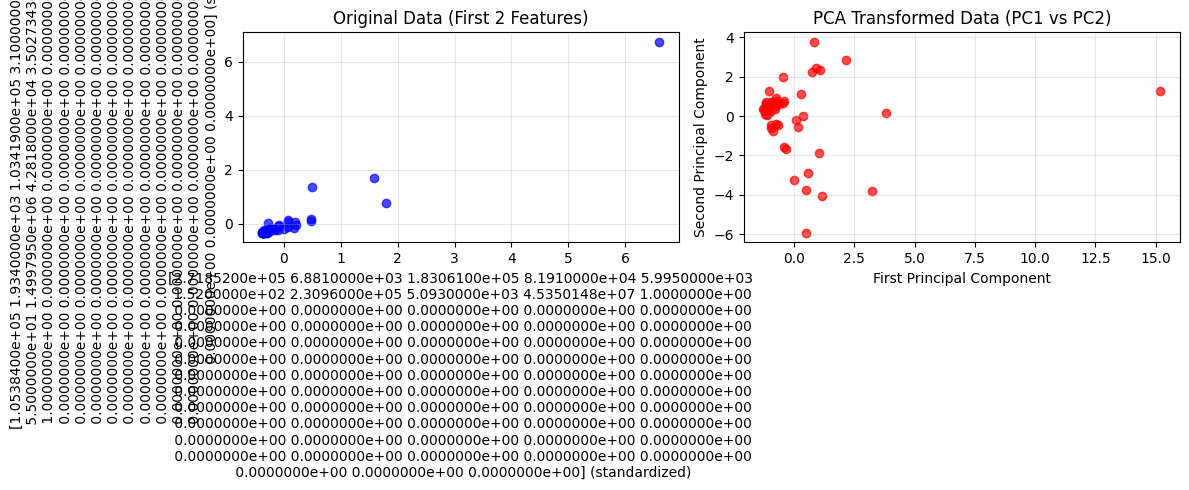

In [16]:
# Step 6: Visualize Before and After PCA
plt.figure(figsize=(12, 5))

# Plot 1: Original data (first two features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7, c='blue')
plt.xlabel(f'{numerical_data[0]} (standardized)')
plt.ylabel(f'{numerical_data[1]} (standardized)')
plt.title('Original Data (First 2 Features)')
plt.grid(True, alpha=0.3)

# Plot 3: PCA data (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, c='red')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformed Data (PC1 vs PC2)')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()